# Time Series and Forecasting Laboratory (201DSL416)
## Name: Hrishikesh Mahesh Patekar
## Roll No: 66

## Experiment No 5: Eliminating Trend and Seasonality of Differencing, Decomposition.

### Maximum Marks: 10


1. Understand and apply methods for removing trends and seasonality in time series data.
2. Apply differencing techniques to remove trends and seasonality from the given dataset.
3. Utilize decomposition methods to extract trend, seasonal, and residual components from the given dataset for analysis

In [2]:
import pandas as pd

data = pd.read_csv('AirPassengers.csv')

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [3]:
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


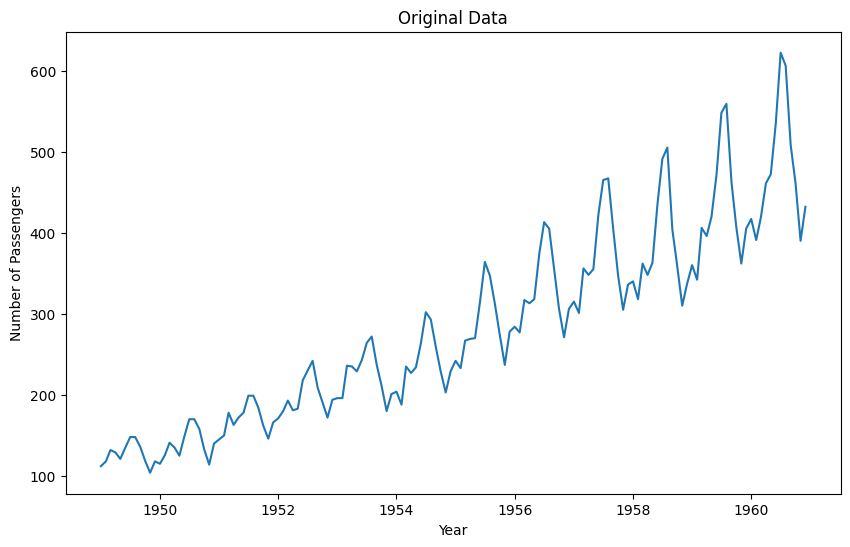

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title('Original Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [5]:
import numpy as np
first_order_diff = data.diff().dropna()

second_order_diff = data.diff().diff().dropna()


epsilon = 1e-10
log_diff = data.diff().dropna()
log_diff = log_diff[log_diff > 0]
log_diff = log_diff.apply(lambda x: np.log(x + epsilon))

percentages_diff = data.pct_change().dropna()

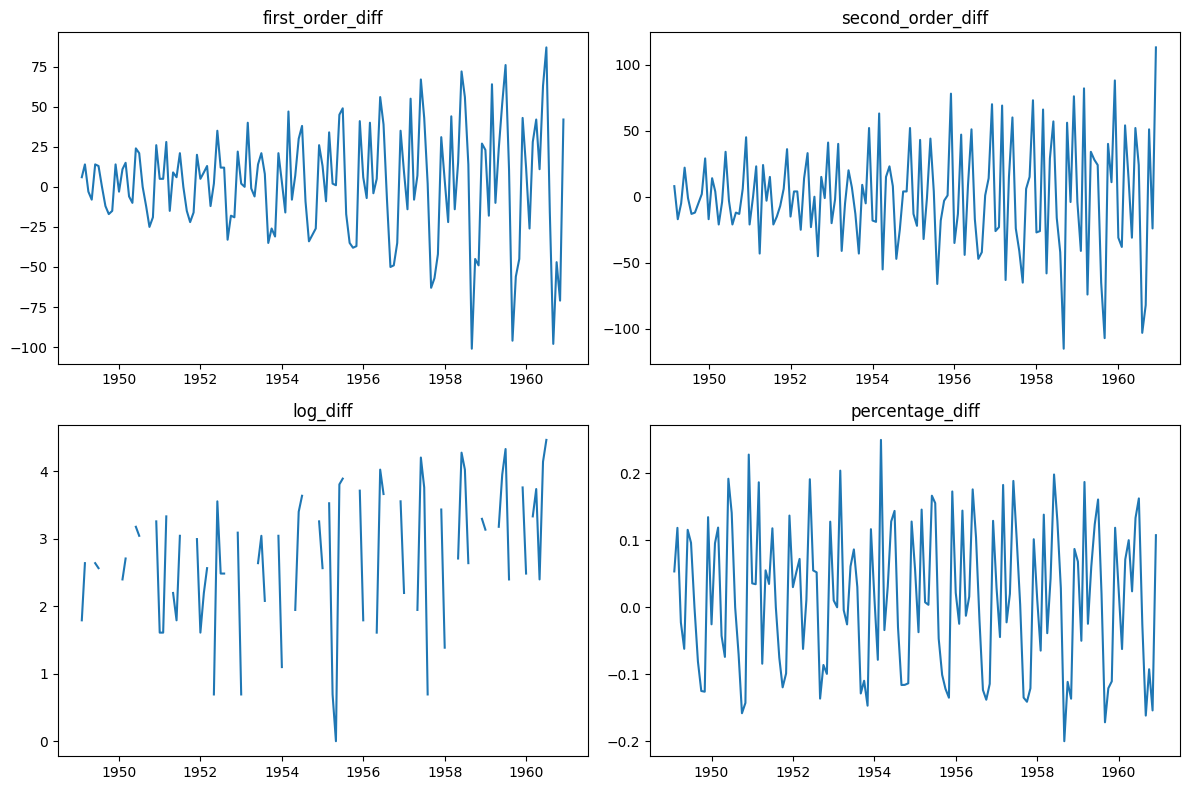

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(first_order_diff)
plt.title('first_order_diff')

plt.subplot(2,2,2)
plt.plot(second_order_diff)
plt.title('second_order_diff')

plt.subplot(2,2,3)
plt.plot(log_diff)
plt.title('log_diff')

plt.subplot(2,2,4)
plt.plot(percentages_diff)
plt.title('percentage_diff')

plt.tight_layout()
plt.show()

In [7]:
# prompt: APPLY DECOMPOSITION METHOD ON IT

from statsmodels.tsa.seasonal import seasonal_decompose
result_additive = seasonal_decompose(data['#Passengers'], model='additive')

result_multiplicative = seasonal_decompose(data['#Passengers'], model='multiplicative')

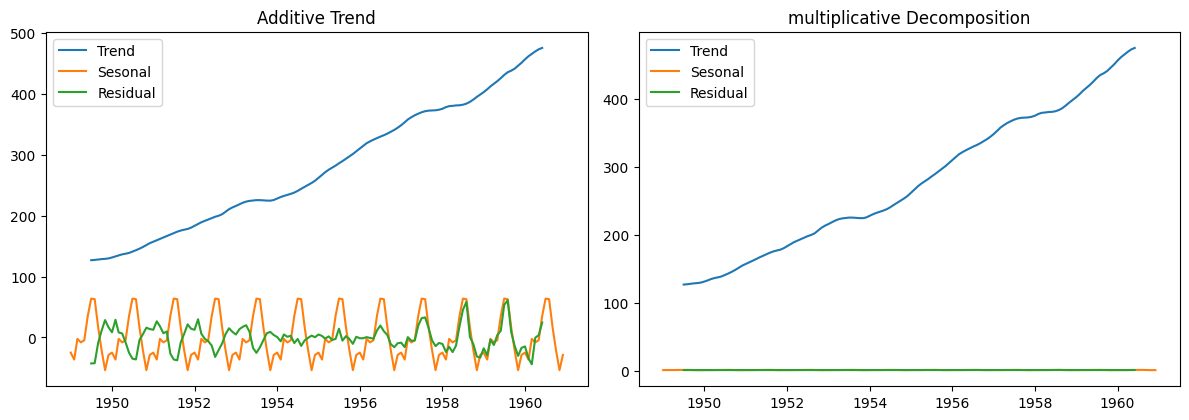

In [8]:
# prompt: vizulaize decomposing components

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(result_additive.trend, label='Trend')
plt.plot(result_additive.seasonal, label='Sesonal')
plt.plot(result_additive.resid, label='Residual')
plt.title('Additive Trend')
plt.legend()

plt.subplot(2,2,2)
plt.plot(result_multiplicative.trend, label='Trend')
plt.plot(result_multiplicative.seasonal, label='Sesonal')
plt.plot(result_multiplicative.resid, label='Residual')
plt.title('multiplicative Decomposition')
plt.legend()


plt.tight_layout()
plt.show()
